In [6]:
!py --version

Python 3.10.0


In [7]:
%pip install tqdm
%pip install ipywidgets
%pip install jupyterlab_widgets
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Python310\python.exe -m pip install --upgrade pip' command.


In [8]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6646158610825665765
xla_global_id: -1
]


In [9]:
import os
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
import tensorflow as tf
tf.debugging.set_log_device_placement(True)

print("GPUs disponíveis:", tf.config.list_physical_devices('GPU'))


GPUs disponíveis: []


In [10]:
import os
import matplotlib.pyplot as plt
import cv2
from glob import glob

# Diretório dos dados brutos
DATA_DIR = "C:/Repositorios/Meus/PAI-Detecao-de-doencas-em-plantas-com-visao-computacional/data/raw/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/"

# Subdiretórios para treino, validação e teste
TRAIN_DIR = os.path.join(DATA_DIR, "train")
VALID_DIR = os.path.join(DATA_DIR, "valid")
TEST_DIR = "data/raw/new-plant-diseases-dataset/test/test"

print(f"Diretório de treino: {TRAIN_DIR}")
print(f"Diretório de validação: {VALID_DIR}")
print(f"Diretório de teste: {TEST_DIR}")


Diretório de treino: C:/Repositorios/Meus/PAI-Detecao-de-doencas-em-plantas-com-visao-computacional/data/raw/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train
Diretório de validação: C:/Repositorios/Meus/PAI-Detecao-de-doencas-em-plantas-com-visao-computacional/data/raw/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid
Diretório de teste: data/raw/new-plant-diseases-dataset/test/test


In [11]:
# Listar as classes no diretório de treino
classes = [d for d in os.listdir(TRAIN_DIR) if os.path.isdir(os.path.join(TRAIN_DIR, d))]
print(f"Classes disponíveis no dataset: {classes}")
print(f"Quantidade de classes: {len(classes)}")


Classes disponíveis no dataset: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___healthy', 'Strawberry___Leaf_scorch', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider

In [12]:
# Contar imagens por classe no conjunto de treino
imagens_por_classe = {classe: len(glob(os.path.join(TRAIN_DIR, classe, "*.JPG"))) for classe in classes}

# Mostrar os resultados
for classe, count in imagens_por_classe.items():
    print(f"{classe}: {count} imagens")


Apple___Apple_scab: 2016 imagens
Apple___Black_rot: 1987 imagens
Apple___Cedar_apple_rust: 1760 imagens
Apple___healthy: 2008 imagens
Blueberry___healthy: 1816 imagens
Cherry_(including_sour)___healthy: 1826 imagens
Cherry_(including_sour)___Powdery_mildew: 1683 imagens
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot: 1642 imagens
Corn_(maize)___Common_rust_: 1907 imagens
Corn_(maize)___healthy: 1859 imagens
Corn_(maize)___Northern_Leaf_Blight: 1908 imagens
Grape___Black_rot: 1888 imagens
Grape___Esca_(Black_Measles): 1920 imagens
Grape___healthy: 1692 imagens
Grape___Leaf_blight_(Isariopsis_Leaf_Spot): 1722 imagens
Orange___Haunglongbing_(Citrus_greening): 2010 imagens
Peach___Bacterial_spot: 1838 imagens
Peach___healthy: 1728 imagens
Pepper,_bell___Bacterial_spot: 1913 imagens
Pepper,_bell___healthy: 1988 imagens
Potato___Early_blight: 1939 imagens
Potato___healthy: 1824 imagens
Potato___Late_blight: 1939 imagens
Raspberry___healthy: 1781 imagens
Soybean___healthy: 2022 imagens
Sq

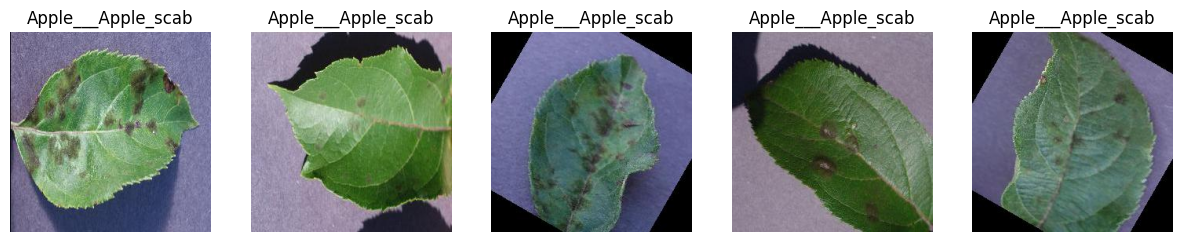

In [13]:
import matplotlib.pyplot as plt
import random

def visualizar_imagens(classe, n=5, dir_type="train"):
    """
    Visualiza imagens aleatórias de uma classe específica.

    Args:
        classe (str): Nome da classe.
        n (int): Número de imagens a serem exibidas.
        dir_type (str): Tipo de diretório ('train' ou 'valid').
    """
    if dir_type == "train":
        classe_dir = os.path.join(TRAIN_DIR, classe)
    elif dir_type == "valid":
        classe_dir = os.path.join(VALID_DIR, classe)
    else:
        raise ValueError("Tipo de diretório deve ser 'train' ou 'valid'")
    
    imagens = glob(os.path.join(classe_dir, "*.JPG"))
    plt.figure(figsize=(15, 5))
    
    for i in range(n):
        img_path = random.choice(imagens)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, n, i + 1)
        plt.imshow(img)
        plt.title(classe)
        plt.axis("off")
    
    plt.show()

# Visualizar imagens da classe "Apple___Apple_scab"
visualizar_imagens("Apple___Apple_scab", n=5)

In [14]:
import numpy as np
import cv2
from tqdm.notebook import tqdm
from glob import glob
import os

def carregar_dados_com_filtro(data_dir, classes, limite_por_classe=100):
    """
    Carrega imagens e rótulos de um diretório específico mantendo o tamanho original (256x256),
    com uma barra de progresso para exibir o status de carregamento. Limita o número de imagens por classe.

    Args:
        data_dir (str): Diretório base dos dados.
        classes (list): Lista das classes selecionadas.
        limite_por_classe (int): Número máximo de imagens a carregar por classe.

    Returns:
        tuple: Arrays de imagens (X) e rótulos (y).
    """
    imagens = []
    rotulos = []
    
    # Inicializa a barra de progresso
    total_imagens = sum([min(len(glob(os.path.join(data_dir, classe, "*.*"))), limite_por_classe) for classe in classes])
    progress_bar = tqdm(total=total_imagens, desc="Carregando imagens", unit="imagens")

    for classe_idx, classe in enumerate(classes):
        classe_dir = os.path.join(data_dir, classe)
        imagens_classe = glob(os.path.join(classe_dir, "*.*"))[:limite_por_classe]  # Aceita qualquer extensão
        for img_path in imagens_classe:
            # Carrega e processa a imagem
            img = cv2.imread(img_path)
            if img is None:
                print(f"Erro ao carregar a imagem: {img_path}")
                continue
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Converte para RGB
            imagens.append(img / 255.0)  # Normalizar (escala 0 a 1)
            rotulos.append(classe_idx)
            
            # Atualiza a barra de progresso
            progress_bar.update(1)

    # Fecha a barra de progresso
    progress_bar.close()
    return np.array(imagens), np.array(rotulos)


# Diretórios de treino e validação
TRAIN_DIR = r"C:\Repositorios\Meus\PAI-Detecao-de-doencas-em-plantas-com-visao-computacional\data\raw\new-plant-diseases-dataset\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train"
VALID_DIR = r"C:\Repositorios\Meus\PAI-Detecao-de-doencas-em-plantas-com-visao-computacional\data\raw\new-plant-diseases-dataset\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\valid"

# Classes selecionadas
classes_selecionadas = [
    "Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot",
    "Corn_(maize)___Common_rust_",
    "Corn_(maize)___Northern_Leaf_Blight",
    "Corn_(maize)___healthy",
    # "Grape___Black_rot",
    # "Grape___Esca_(Black_Measles)",
    # "Grape___Leaf_blight_(Isariopsis_Leaf_Spot)",
    # "Grape___healthy",
    # "Orange___Haunglongbing_(Citrus_greening)",
    "Potato___Early_blight",
    "Potato___Late_blight",
    "Potato___healthy",
    "Tomato___Bacterial_spot",
    "Tomato___Early_blight",
    "Tomato___Late_blight",
    "Tomato___Leaf_Mold",
    "Tomato___Target_Spot",
    "Tomato___Tomato_mosaic_virus",
    "Tomato___Tomato_Yellow_Leaf_Curl_Virus",
    "Tomato___healthy"
]

# Carregar os dados de treino com filtro
X_train, y_train = carregar_dados_com_filtro(TRAIN_DIR, classes_selecionadas, limite_por_classe=500)

# Carregar os dados de validação com filtro
X_valid, y_valid = carregar_dados_com_filtro(VALID_DIR, classes_selecionadas, limite_por_classe=100)

print(f"Conjunto de treino: {X_train.shape}, Rótulos: {y_train.shape}")
print(f"Conjunto de validação: {X_valid.shape}, Rótulos: {y_valid.shape}")


Carregando imagens:   0%|          | 0/7500 [00:00<?, ?imagens/s]

Carregando imagens:   0%|          | 0/1500 [00:00<?, ?imagens/s]

Conjunto de treino: (7500, 256, 256, 3), Rótulos: (7500,)
Conjunto de validação: (1500, 256, 256, 3), Rótulos: (1500,)


In [15]:
from tensorflow.keras import layers, models
  
# Definir o modelo 
model = models.Sequential([
    # Camadas convolucionais
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flatten + Dense
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(classes_selecionadas), activation='softmax')
])

# Exibir o resumo do modelo
model.summary()


Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FloorMod in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Cast in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op StatelessRandomGetKeyCounter in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0


c:\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Executing op StatelessRandomUniformV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FloorMod in device /job:localhost

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │         1,935 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,840,911 (56.61 MB)

 Trainable params: 14,840,911 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job

In [17]:
# Treinar o modelo
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=10,  # Ajuste o número de épocas conforme necessário
    batch_size=32
)


Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsD

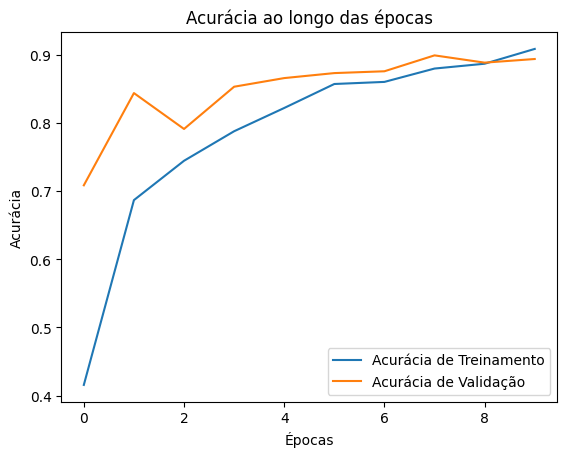

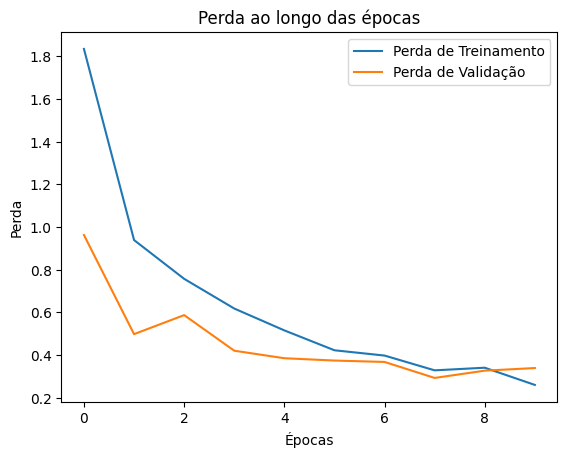

In [20]:
import matplotlib.pyplot as plt

# Plotar a acurácia
plt.plot(history.history['accuracy'], label='Acurácia de Treinamento')
plt.plot(history.history['val_accuracy'], label='Acurácia de Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.title('Acurácia ao longo das épocas')
plt.show()

# Plotar a perda
plt.plot(history.history['loss'], label='Perda de Treinamento')
plt.plot(history.history['val_loss'], label='Perda de Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()
plt.title('Perda ao longo das épocas')
plt.show()


In [22]:
# Avaliar no conjunto de validação
val_loss, val_accuracy = model.evaluate(X_valid, y_valid)
print(f"Perda no conjunto de validação: {val_loss:.4f}")
print(f"Acurácia no conjunto de validação: {val_accuracy:.4f}")


Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Pr

Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing o

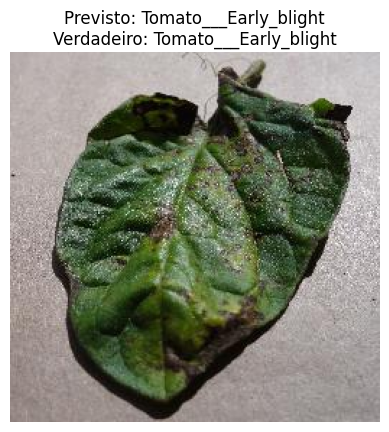

In [30]:
import random

# Escolher uma imagem aleatória do conjunto de validação
idx = random.randint(0, len(X_valid) - 1)
img = X_valid[idx]
true_label = y_valid[idx]

# Fazer a predição
prediction = model.predict(img[np.newaxis, ...])  # Adiciona dimensão de batch
predicted_label = classes_selecionadas[np.argmax(prediction)]

# Visualizar a imagem e o resultado
plt.imshow(img)
plt.title(f"Previsto: {predicted_label}\nVerdadeiro: {classes_selecionadas[true_label]}")
plt.axis("off")
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Visualizar perda
plt.plot(history.history['loss'], label='Treinamento')
plt.plot(history.history['val_loss'], label='Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()
plt.title('Perda durante o Treinamento e Validação')
plt.show()

# Visualizar precisão
plt.plot(history.history['accuracy'], label='Treinamento')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.title('Acurácia durante o Treinamento e Validação')
plt.show()
